# V1

用随机森林查看一下效果

V1 

得分： 0.14642

排名：2530

V1.1 13层降至 8 层 
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=123, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=True, random_state=10, verbose=0, warm_start=False)
           
得分： 0.15869

排名：2519

In [1]:
import pickle

import numpy as np

from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

from sklearn import cross_validation, metrics
from sklearn.metrics import classification_report

from sklearn.grid_search import GridSearchCV 

import pandas as pd

D:\Anaconda2\envs\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data_train,data_test = pickle.load(open("./datas_clean_V1.ggy","rb"))

data_train.head()

,SalePrices,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,1,60,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,181500,2,20,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,223500,3,60,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,140000,4,70,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,250000,5,60,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [3]:
def showColums():
    
    print('+'*20)
    
    print(data_train.columns.values.tolist())
    print('-'*20)
    print(data_test.columns.values.tolist())

    print('+'*20)
    
    data_train.info()
    print('-'*20)
    data_test.info()
    
    print('+'*20)
    
showColums()

++++++++++++++++++++
['SalePrices', 'Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighb

In [4]:
from sklearn import cross_validation

split_train, split_cv = cross_validation.train_test_split(data_train, test_size=0.3, random_state=0)

train_np = split_train.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 2:]

print(X.shape,y.shape)


train_np_v = split_cv.as_matrix()

# y即Survival结果
y_v = train_np_v[:, 0]

# X即特征属性值
X_v = train_np_v[:, 2:]

print(X_v.shape,y_v.shape)
#print(split_cv.info())

(1022, 258) (1022,)
(438, 258) (438,)


D:\Anaconda2\envs\python36\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Anaconda2\envs\python36\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [5]:
def showModelAbility(rf,X=X,y=y):
    
    y_pred = rf.predict(X)

    print(y)
    print(y_pred)

    print('score',rf.score(X,y) )
    print('oob_score_',rf.oob_score_)

    print('R^2',metrics.r2_score(y,y_pred) )
    print('均方误差',metrics.mean_squared_error(y,y_pred) )
    print('平均绝对误差',metrics.mean_absolute_error(y,y_pred) )

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation, metrics

rf0 = RandomForestRegressor(oob_score=True, random_state=10)  
rf0.fit(X,y)  


showModelAbility(rf0)

[219500. 173000. 116500. ... 112000. 234000. 221000.]
[223360. 163200. 112650. ... 125600. 221150. 224750.]
score 0.9678165722434093
oob_score_ 0.7422380301707738
R^2 0.9678165722434093
均方误差 196311063.29103717
平均绝对误差 8159.8009784735805


D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [7]:
from sklearn.grid_search import GridSearchCV 


#首先对n_estimators进行网格搜索  
param_test1= {'n_estimators':list(range(10,201,10))}  
gsearch1= GridSearchCV(estimator = RandomForestRegressor(oob_score=True,random_state=10),  
                       param_grid =param_test1,cv=5)  
gsearch1.fit(X,y)  
gsearch1.grid_scores_,gsearch1.best_params_, gsearch1.best_score_ 

D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda2\envs\python36\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not

([mean: 0.82188, std: 0.03459, params: {'n_estimators': 10},
  mean: 0.84193, std: 0.03221, params: {'n_estimators': 20},
  mean: 0.84749, std: 0.03521, params: {'n_estimators': 30},
  mean: 0.84529, std: 0.03695, params: {'n_estimators': 40},
  mean: 0.84562, std: 0.03898, params: {'n_estimators': 50},
  mean: 0.84674, std: 0.03526, params: {'n_estimators': 60},
  mean: 0.84745, std: 0.03496, params: {'n_estimators': 70},
  mean: 0.84804, std: 0.03516, params: {'n_estimators': 80},
  mean: 0.84885, std: 0.03375, params: {'n_estimators': 90},
  mean: 0.84917, std: 0.03367, params: {'n_estimators': 100},
  mean: 0.85055, std: 0.03245, params: {'n_estimators': 110},
  mean: 0.84999, std: 0.03211, params: {'n_estimators': 120},
  mean: 0.85139, std: 0.03157, params: {'n_estimators': 130},
  mean: 0.85074, std: 0.03246, params: {'n_estimators': 140},
  mean: 0.85146, std: 0.03191, params: {'n_estimators': 150},
  mean: 0.85184, std: 0.03170, params: {'n_estimators': 160},
  mean: 0.85190, 

In [8]:
best_n_estimators = gsearch1.best_params_["n_estimators"]

param_test2= {'max_depth':list(range(3,8,2)), 'min_samples_split':list(range(5,50,5))}  
gsearch2= GridSearchCV(estimator = RandomForestRegressor(n_estimators= best_n_estimators,oob_score=True,random_state=10),  
   param_grid = param_test2,iid=False, cv=5)  
gsearch2.fit(X,y)  
gsearch2.grid_scores_,gsearch2.best_params_, gsearch2.best_score_ 

([mean: 0.75730, std: 0.02568, params: {'max_depth': 3, 'min_samples_split': 5},
  mean: 0.75705, std: 0.02558, params: {'max_depth': 3, 'min_samples_split': 10},
  mean: 0.75749, std: 0.02484, params: {'max_depth': 3, 'min_samples_split': 15},
  mean: 0.75651, std: 0.02395, params: {'max_depth': 3, 'min_samples_split': 20},
  mean: 0.75583, std: 0.02395, params: {'max_depth': 3, 'min_samples_split': 25},
  mean: 0.75507, std: 0.02411, params: {'max_depth': 3, 'min_samples_split': 30},
  mean: 0.75382, std: 0.02385, params: {'max_depth': 3, 'min_samples_split': 35},
  mean: 0.75287, std: 0.02333, params: {'max_depth': 3, 'min_samples_split': 40},
  mean: 0.75201, std: 0.02285, params: {'max_depth': 3, 'min_samples_split': 45},
  mean: 0.82469, std: 0.02738, params: {'max_depth': 5, 'min_samples_split': 5},
  mean: 0.82299, std: 0.02542, params: {'max_depth': 5, 'min_samples_split': 10},
  mean: 0.82110, std: 0.02540, params: {'max_depth': 5, 'min_samples_split': 15},
  mean: 0.81769, s

In [9]:
best_max_depth = gsearch2.best_params_["max_depth"]
best_min_samples_split = gsearch2.best_params_["min_samples_split"]

rf1= RandomForestRegressor(n_estimators= best_n_estimators, 
                            max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,
                            oob_score=True,random_state=10)  
rf1.fit(X,y)  

tempRf = rf1

y_pred = tempRf.predict(X)

print(y)
print(y_pred)

print('score',tempRf.score(X,y) )
print('oob_score_',tempRf.oob_score_)

print('R^2',metrics.r2_score(y,y_pred) )
print('均方误差',metrics.mean_squared_error(y,y_pred) )
print('平均绝对误差',metrics.mean_absolute_error(y,y_pred) )

[219500. 173000. 116500. ... 112000. 234000. 221000.]
[229092.64283878 164219.49686174 119830.60306961 ... 144692.43320028
 198423.51479105 221617.39556148]
score 0.955150599266649
oob_score_ 0.8447086168259508
R^2 0.955150599266649
均方误差 273570410.601368
平均绝对误差 11572.622650717707


In [32]:
#再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参 
param_test3= {'min_samples_split':list(range(10,40,5)), 'min_samples_leaf':list(range(10,40,5))}  
gsearch3= GridSearchCV(estimator = RandomForestRegressor(n_estimators= best_n_estimators,
                                                          max_depth=best_max_depth,oob_score=True, random_state=10),  
   param_grid = param_test3,iid=False, cv=5)  
gsearch3.fit(X,y)  
gsearch3.grid_scores_,gsearch3.best_params_, gsearch3.best_score_ 

([mean: 0.83131, std: 0.03046, params: {'min_samples_leaf': 10, 'min_samples_split': 10},
  mean: 0.83131, std: 0.03046, params: {'min_samples_leaf': 10, 'min_samples_split': 15},
  mean: 0.83131, std: 0.03046, params: {'min_samples_leaf': 10, 'min_samples_split': 20},
  mean: 0.82594, std: 0.03066, params: {'min_samples_leaf': 10, 'min_samples_split': 25},
  mean: 0.82187, std: 0.03093, params: {'min_samples_leaf': 10, 'min_samples_split': 30},
  mean: 0.81731, std: 0.03105, params: {'min_samples_leaf': 10, 'min_samples_split': 35},
  mean: 0.81595, std: 0.03247, params: {'min_samples_leaf': 15, 'min_samples_split': 10},
  mean: 0.81595, std: 0.03247, params: {'min_samples_leaf': 15, 'min_samples_split': 15},
  mean: 0.81595, std: 0.03247, params: {'min_samples_leaf': 15, 'min_samples_split': 20},
  mean: 0.81595, std: 0.03247, params: {'min_samples_leaf': 15, 'min_samples_split': 25},
  mean: 0.81595, std: 0.03247, params: {'min_samples_leaf': 15, 'min_samples_split': 30},
  mean: 0.

In [34]:
best_min_samples_leaf = gsearch3.best_params_["min_samples_leaf"]
best_min_samples_split = gsearch3.best_params_["min_samples_split"]

#最后我们再对最大特征数max_features做调参:  
param_test4= {'max_features':list(range(3,int(258*1/2),20))}  
gsearch4= GridSearchCV(estimator = RandomForestRegressor(n_estimators= best_n_estimators,
                                                          max_depth=best_max_depth, 
                                                          min_samples_split=best_min_samples_split,  
                                                          min_samples_leaf=best_min_samples_leaf ,
                                                          oob_score=True, random_state=10),  
                                                       param_grid = param_test4,iid=False, cv=5)  
gsearch4.fit(X,y)  
gsearch4.grid_scores_,gsearch4.best_params_, gsearch4.best_score_ 

([mean: 0.53228, std: 0.05490, params: {'max_features': 3},
  mean: 0.80988, std: 0.04510, params: {'max_features': 23},
  mean: 0.82726, std: 0.03786, params: {'max_features': 43},
  mean: 0.82999, std: 0.03665, params: {'max_features': 63},
  mean: 0.83637, std: 0.03369, params: {'max_features': 83},
  mean: 0.83616, std: 0.03279, params: {'max_features': 103},
  mean: 0.83769, std: 0.03111, params: {'max_features': 123}],
 {'max_features': 123},
 0.8376913890057647)

In [35]:
best_max_features = gsearch4.best_params_["max_features"]

#用我们搜索到的最佳参数，我们再看看最终的模型拟合：  
rf2= RandomForestRegressor(n_estimators= best_n_estimators, 
                            max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,  
                            min_samples_leaf=best_min_samples_leaf,
                            max_features=best_max_features ,
                            oob_score=True, random_state=10)  
rf2.fit(X,y) 

tempRf = rf2

y_pred = tempRf.predict(X)

print(y)
print(y_pred)

print('score',tempRf.score(X,y) )
print('oob_score_',tempRf.oob_score_)

print('R^2',metrics.r2_score(y,y_pred) )
print('均方误差',metrics.mean_squared_error(y,y_pred) )
print('平均绝对误差',metrics.mean_absolute_error(y,y_pred) )

[219500. 173000. 116500. ... 112000. 234000. 221000.]
[230419.83436213 168399.02655519 115598.71141138 ... 146995.31111629
 201447.82329252 217498.73970007]
score 0.8888677706702909
oob_score_ 0.8355274470122296
R^2 0.8888677706702909
均方误差 677879505.8941764
平均绝对误差 15114.063099699153


In [36]:
for rf in [rf0,rf1,rf2]:
    tempRf = rf

    y_pred = tempRf.predict(X)

    print(y)
    print(y_pred)

    print('score',tempRf.score(X,y) )
    print('oob_score_',tempRf.oob_score_)

    print('R^2',metrics.r2_score(y,y_pred) )
    print('均方误差',metrics.mean_squared_error(y,y_pred) )
    print('平均绝对误差',metrics.mean_absolute_error(y,y_pred) )
    
    print('-'*20)

[219500. 173000. 116500. ... 112000. 234000. 221000.]
[223360. 163200. 112650. ... 125600. 221150. 224750.]
score 0.9678165722434093
oob_score_ 0.7422380301707738
R^2 0.9678165722434093
均方误差 196311063.29103717
平均绝对误差 8159.8009784735805
--------------------
[219500. 173000. 116500. ... 112000. 234000. 221000.]
[229092.64283878 164219.49686174 119830.60306961 ... 144692.43320028
 198423.51479105 221617.39556148]
score 0.955150599266649
oob_score_ 0.8447086168259508
R^2 0.955150599266649
均方误差 273570410.601368
平均绝对误差 11572.622650717707
--------------------
[219500. 173000. 116500. ... 112000. 234000. 221000.]
[230419.83436213 168399.02655519 115598.71141138 ... 146995.31111629
 201447.82329252 217498.73970007]
score 0.8888677706702909
oob_score_ 0.8355274470122296
R^2 0.8888677706702909
均方误差 677879505.8941764
平均绝对误差 15114.063099699153
--------------------


In [37]:
import copy

rf_final = copy.copy(rf2)

In [38]:
train_all = data_train.values

# y即Survival结果
y_all = train_all[:, 0]

# X即特征属性值
X_all = train_all[:, 2:]

print(X_all.shape)

(1460, 258)


In [39]:


rf_final.fit(X_all,y_all)  

showModelAbility(rf_final,X_all,y_all)

print (rf_final)

[208500. 181500. 223500. ... 266500. 142125. 147500.]
[201784.53092094 168357.14661419 210724.48574154 ... 242988.23314997
 131597.90289592 148876.88492719]
score 0.8933310327606782
oob_score_ 0.844477075493292
R^2 0.8933310327606782
均方误差 672738624.9959534
平均绝对误差 14989.741052300713
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=123, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=True, random_state=10, verbose=0, warm_start=False)


In [40]:
names = data_train.columns.values.tolist()[2:]

results = pd.DataFrame({"ColName":names,"value":rf_final.feature_importances_})

results.head()

,ColName,value
0,MSSubClass,0.001600
1,LotArea,0.011859
2,OverallQual,0.398515
3,OverallCond,0.002115
4,YearBuilt,0.033650


In [41]:
results =results.sort_values("value",ascending =False)
results.head(30)

,ColName,value
2,OverallQual,0.398515
13,GrLivArea,0.127167
23,GarageCars,0.110017
142,ExterQual_TA,0.056809
10,TotalBsmtSF,0.051764
4,YearBuilt,0.033650
11,1stFlrSF,0.031892
7,BsmtFinSF1,0.023723
24,GarageArea,0.021765
154,BsmtQual_Ex,0.018966


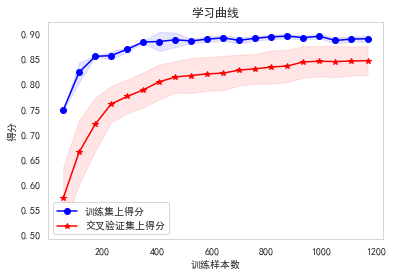

In [42]:
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline


from sklearn.learning_curve import learning_curve


# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if True:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, '*-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.gca().invert_yaxis()
        plt.draw()
        plt.show()
        

    #midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    #diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    #return midpoint, diff


plot_learning_curve(rf_final, u"学习曲线", X_all, y_all,cv=5)

In [ ]:
#过拟合了

In [43]:
#空值检查
for data,name in zip(data_test.isnull().sum(),names):
    print(data,name)

0 MSSubClass
0 LotArea
0 OverallQual
0 OverallCond
0 YearBuilt
0 YearRemodAdd
0 MasVnrArea
0 BsmtFinSF1
0 BsmtFinSF2
0 BsmtUnfSF
0 TotalBsmtSF
0 1stFlrSF
0 2ndFlrSF
0 GrLivArea
0 BsmtFullBath
0 BsmtHalfBath
0 FullBath
0 HalfBath
0 BedroomAbvGr
0 KitchenAbvGr
0 TotRmsAbvGrd
0 Fireplaces
0 GarageYrBlt
0 GarageCars
0 GarageArea
0 WoodDeckSF
0 OpenPorchSF
0 EnclosedPorch
0 MoSold
0 YrSold
0 MSZoning_C (all)
0 MSZoning_FV
0 MSZoning_RH
0 MSZoning_RL
0 MSZoning_RM
0 LotShape_IR1
0 LotShape_IR2
0 LotShape_IR3
0 LotShape_Reg
0 LandContour_Bnk
0 LandContour_HLS
0 LandContour_Low
0 LandContour_Lvl
0 LotConfig_Corner
0 LotConfig_CulDSac
0 LotConfig_FR2
0 LotConfig_FR3
0 LotConfig_Inside
0 LandSlope_Gtl
0 LandSlope_Mod
0 LandSlope_Sev
0 Neighborhood_Blmngtn
0 Neighborhood_Blueste
0 Neighborhood_BrDale
0 Neighborhood_BrkSide
0 Neighborhood_ClearCr
0 Neighborhood_CollgCr
0 Neighborhood_Crawfor
0 Neighborhood_Edwards
0 Neighborhood_Gilbert
0 Neighborhood_IDOTRR
0 Neighborhood_MeadowV
0 Neighborhood_M

In [44]:
data_test.info()

ids = data_test.values[:,0].astype(np.int32)

X_test = data_test.values[:,1:]

print(X_test.shape)


y_pred = rf_final.predict(X_test)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 259 entries, Id to SaleCondition_Partial
dtypes: float64(10), int64(21), uint8(228)
memory usage: 689.6 KB
(1459, 258)


In [45]:
resluts = pd.DataFrame({"Id":ids,"SalePrice":y_pred})

resluts.head()

,Id,SalePrice
0,1461,125993.255387
1,1462,149188.781426
2,1463,176749.520361
3,1464,182854.428548
4,1465,202313.901686


In [46]:
print(resluts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int32
SalePrice    1459 non-null float64
dtypes: float64(1), int32(1)
memory usage: 17.2 KB
None


In [47]:
resluts.to_csv('Result_V1.1_V1.csv', index=False)

In [37]:
import pickle


pickle.dump(rf_final,open("./calc_V1.ggy","wb"))